In [1]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
dataset_name = 'kinematics'
shapes = {
    'S': (6,5,3),
    'V2': (4,),
    'V3': (3,)
}
epochs = 30
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([8], [1])


### S(X,X,X)

Average elapsed k-fold validation time: 229.62791 sec
Last measures: [0.2629692256450653, 0.26957955956459045, 0.017530174925923347, 0.253811776638031, 0.020370082929730415, 0.2629692256450653, 0.019624119624495506, 0.25703784823417664, 0.253811776638031, 0.25874459743499756, 0.2629692256450653, 0.26957955956459045, 0.019733399152755737, 0.253811776638031, 0.012589325197041035, 0.019530916586518288, 0.035372860729694366, 0.25703784823417664, 0.253811776638031, 0.03448648750782013, 0.036486923694610596, 0.26957955956459045, 0.03485051542520523, 0.253811776638031, 0.25874459743499756, 0.2629692256450653, 0.26957955956459045, 0.034849636256694794, 0.019649609923362732, 0.020105745643377304]
Loss history average: [0.20411012 0.1670141  0.16238079 0.16033739 0.15938883 0.15906916
 0.15894224 0.15886534 0.15880693 0.15876091 0.15872438 0.15869382
 0.15866469 0.1586319  0.15858061 0.15848496 0.15840728 0.1583769
 0.15836242 0.15835141 0.15834166 0.1583328  0.15832296 0.15831201
 0.15829985 0.

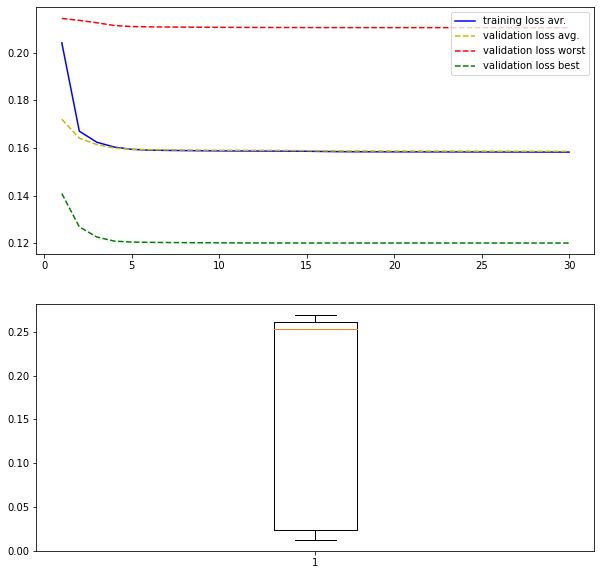

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 272.35808 sec
Last measures: [0.2629692256450653, 0.020255709066987038, 0.25703784823417664, 0.019575344398617744, 0.25874459743499756, 0.2629692256450653, 0.020314224064350128, 0.25703784823417664, 0.253811776638031, 0.25874459743499756, 0.0364837571978569, 0.02002074010670185, 0.0189081858843565, 0.020681800320744514, 0.25874459743499756, 0.2629692256450653, 0.017942577600479126, 0.25703784823417664, 0.020176047459244728, 0.019926169887185097, 0.2629692256450653, 0.26957955956459045, 0.25703784823417664, 0.020650725811719894, 0.25874459743499756, 0.02001322992146015, 0.26957955956459045, 0.019952092319726944, 0.253811776638031, 0.020107224583625793]
Loss history average: [0.19875513 0.15701521 0.15508856 0.15380075 0.15228031 0.15109213
 0.15045658 0.14995544 0.1496584  0.14951603 0.14940304 0.14930209
 0.14921457 0.14913618 0.14906422 0.14900341 0.14895404 0.14891244
 0.14887861 0.14885064 0.14882668 0.14880608 0.14878778 0.14877087
 0.1487535

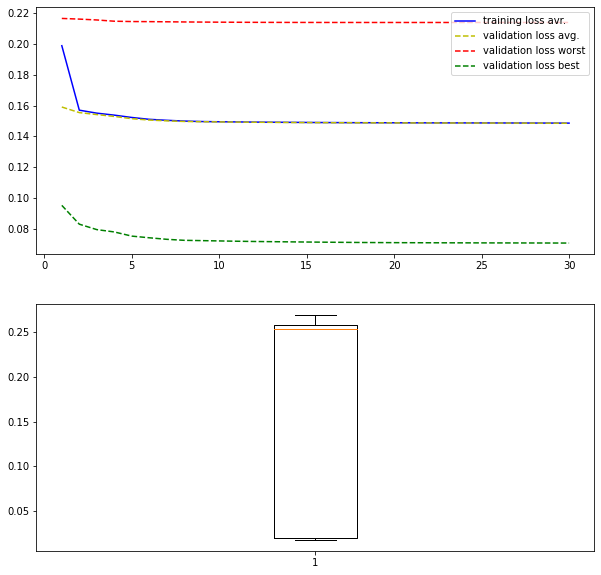

In [4]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 289.59901 sec
Last measures: [0.036483462899923325, 0.020144876092672348, 0.25703784823417664, 0.253811776638031, 0.0202131699770689, 0.020189965143799782, 0.26957955956459045, 0.020006729289889336, 0.021812520921230316, 0.020957695320248604, 0.2629692256450653, 0.26957955956459045, 0.25703784823417664, 0.253811776638031, 0.25874459743499756, 0.019898056983947754, 0.020578594878315926, 0.019832756370306015, 0.253811776638031, 0.020156312733888626, 0.021215682849287987, 0.020559288561344147, 0.03485053405165672, 0.020766163244843483, 0.25874459743499756, 0.021197911351919174, 0.26957955956459045, 0.25703784823417664, 0.253811776638031, 0.020153522491455078]
Loss history average: [0.18251456 0.13645297 0.1333027  0.13186666 0.13072147 0.12948591
 0.12840183 0.12766192 0.12713622 0.12675976 0.1264965  0.12631049
 0.12617438 0.12606961 0.12598529 0.12591508 0.12585544 0.12580391
 0.12575912 0.12572018 0.12568639 0.1256567  0.12563062 0.12560802
 0.12

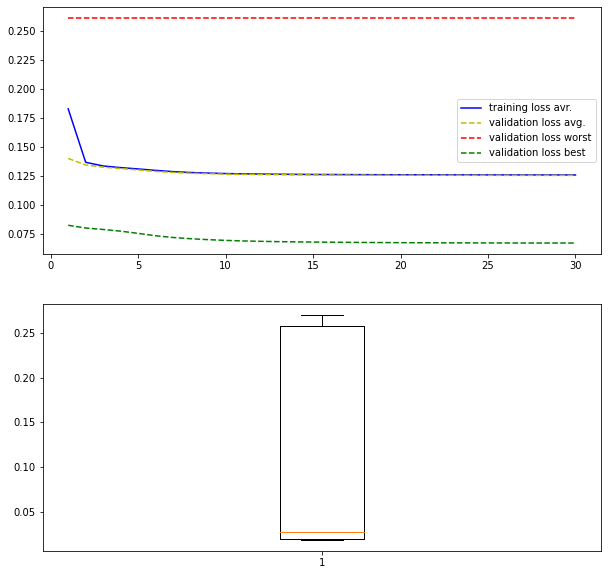

In [5]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(3)

Average elapsed k-fold validation time: 239.85752 sec
Last measures: [0.03648386150598526, 0.03539179265499115, 0.25703784823417664, 0.03150314465165138, 0.25874459743499756, 0.036483537405729294, 0.019827814772725105, 0.25703784823417664, 0.253811776638031, 0.25874459743499756, 0.2629692256450653, 0.017259273678064346, 0.25703784823417664, 0.020649224519729614, 0.25874459743499756, 0.03648357465863228, 0.26957955956459045, 0.25703784823417664, 0.020315377041697502, 0.020280292257666588, 0.2629692256450653, 0.26957955956459045, 0.019858600571751595, 0.03149930760264397, 0.25874459743499756, 0.036483440548181534, 0.02032206766307354, 0.25703784823417664, 0.253811776638031, 0.25874459743499756]
Loss history average: [0.20721621 0.16466885 0.15706757 0.15480318 0.15379501 0.15307232
 0.15271979 0.15249041 0.1522729  0.15217207 0.15210399 0.15204445
 0.15199326 0.15194872 0.15191054 0.15187934 0.1518536  0.15183204
 0.15181437 0.15179886 0.1517864  0.15177735 0.15176606 0.15174369
 0.15172

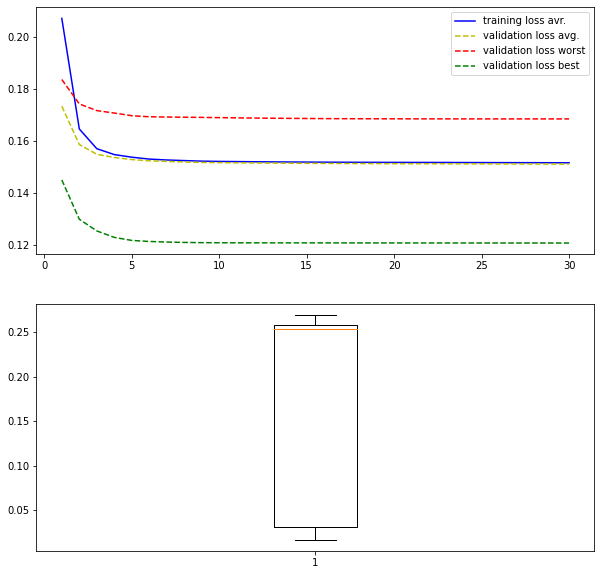

In [6]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(3)

Average elapsed k-fold validation time: 291.04776 sec
Last measures: [0.2629692256450653, 0.26957955956459045, 0.020032810047268867, 0.253811776638031, 0.020174704492092133, 0.2629692256450653, 0.02017347514629364, 0.25703784823417664, 0.253811776638031, 0.02018614113330841, 0.020051386207342148, 0.019908087328076363, 0.0197113249450922, 0.02068331278860569, 0.25874459743499756, 0.2629692256450653, 0.021247874945402145, 0.25703784823417664, 0.020187079906463623, 0.020706012845039368, 0.2629692256450653, 0.019930506125092506, 0.25703784823417664, 0.02067125216126442, 0.25874459743499756, 0.020059887319803238, 0.26957955956459045, 0.25703784823417664, 0.253811776638031, 0.25874459743499756]
Loss history average: [0.19564346 0.15612582 0.15501955 0.15410028 0.15317813 0.15214405
 0.15116697 0.15035497 0.14974815 0.14937925 0.14916391 0.14902561
 0.14892622 0.148849   0.14878611 0.14873413 0.14869023 0.14865321
 0.14862151 0.14859379 0.14856952 0.14854808 0.14852908 0.14851198
 0.14849663 

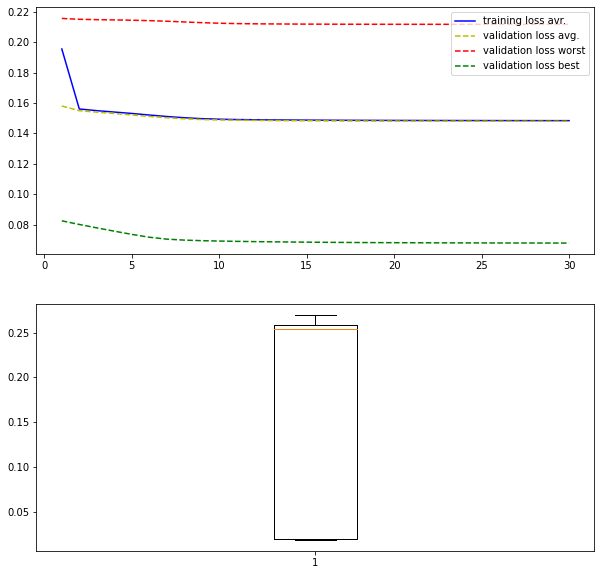

In [7]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)